<a href="https://colab.research.google.com/github/vader97/Project/blob/master/IMDB_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
len(XT)

25000

In [0]:
len(Xt)

25000

In [0]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
#print(word_idx.items())

In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [0]:
#print(idx_word.items())

In [0]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [0]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
## Vectorize the data
import numpy as np

def vectorize_sentence(sentences,dim=10000):
  output = np.zeros((len(sentences),dim))

  for i,idx in enumerate(sentences):
    output[i][idx] = 1

  return output

In [0]:
X_train = vectorize_sentence(XT)
X_test = vectorize_sentence(Xt)

In [0]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [0]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [0]:
Y_train.shape

(25000,)

In [0]:
# BUild the neural network

In [0]:
from keras import models
from keras.layers import Dense

In [0]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(X_train,Y_train,epochs=3,batch_size=512,validation_split=0.2,shuffle=True)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 2s 77us/step - loss: 0.5081 - acc: 0.7951 - val_loss: 0.4132 - val_acc: 0.8286
Epoch 2/3
20000/20000 [==============================] - 1s 64us/step - loss: 0.2996 - acc: 0.9037 - val_loss: 0.2900 - val_acc: 0.8904
Epoch 3/3
20000/20000 [==============================] - 1s 63us/step - loss: 0.2205 - acc: 0.9256 - val_loss: 0.2741 - val_acc: 0.8896


In [0]:
h=hist.history

In [0]:
import matplotlib.pyplot as plt


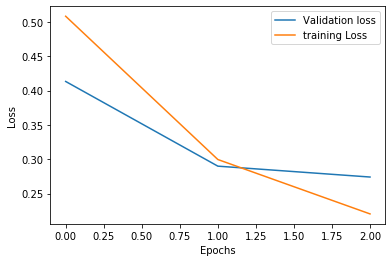

In [0]:
plt.plot(h['val_loss'],label="Validation loss")
plt.plot(h['loss'],label="training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

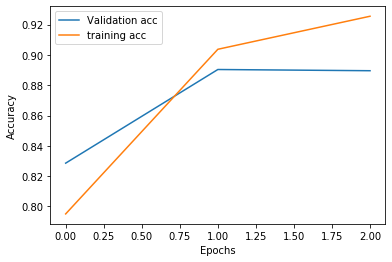

In [0]:
plt.plot(h['val_acc'],label="Validation acc")
plt.plot(h['acc'],label="training acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
model.evaluate(X_test,Y_test)

25000/25000 [==============================] - 2s 86us/step


[0.28706802327156067, 0.88628]

In [0]:
model.evaluate(X_train,Y_train)

25000/25000 [==============================] - 2s 86us/step


[0.19414419128894805, 0.934]

In [0]:
y_result=model.predict(X_test)

In [0]:
y_result.shape

(25000, 1)

In [0]:
Y=np.zeros(y_result.shape)

In [0]:
for i in range(25000):
  if y_result[i]>0.5:
    Y[i]=1
  else:
    Y[i]=0


In [0]:
Y

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])